### Full Name : Parnian Taheri
### Student Number : 99106352


# CART Algorithm Implementation with MNIST Dataset

## Goal
The objective is to implement the Classification and Regression Trees (CART) algorithm from scratch and apply it to the MNIST dataset. After completing the implementation, you will compare its performance with scikit-learn's `DecisionTreeClassifier` and analyze the results through visualizations.

## Part 1: Data Preparation and Exploration

1. **Data Normalization**  
   - Normalize the data using **z-score normalization** to ensure that each feature has a mean of 0 and a standard deviation of 1.

2. **Data Visualization**
   a. Display 10 sample images from the **training set**, **validation set**, and **test set**.  
   b. Create a **histogram** showing the distribution of labels across the **training set**, **validation set**, and **test set**.

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

def prepare_data(batch_size=64, train_ratio=0.8):
    transform = transforms.Compose([
        # To DO
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    full_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    train_size = int(len(full_dataset) * train_ratio)
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

In [ ]:
def explore_data(data_loader, label):
    # Get a batch of data
    # TO DO
    images, labels = next(iter(data_loader))
    # Plot sample images
    # TO DO
    fig, axes = plt.subplots(1, 10, figsize=(15, 2))
    fig.suptitle("Sample Images from "+label)
    for i in range(10):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f'{labels[i].item()}')
        axes[i].axis('off')
    plt.show()
    # Plot label distribution
    # TO DO
    labels_np = labels.numpy()
    plt.hist(labels_np, bins=np.arange(11) - 0.5, edgecolor='black')
    plt.xticks(range(10))
    plt.title("Label Distribution in "+label)
    plt.xlabel("Label")
    plt.ylabel("Frequency")
    plt.show()
    pass

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:02<00:00, 3.82MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:06<00:00, 247kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.79MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



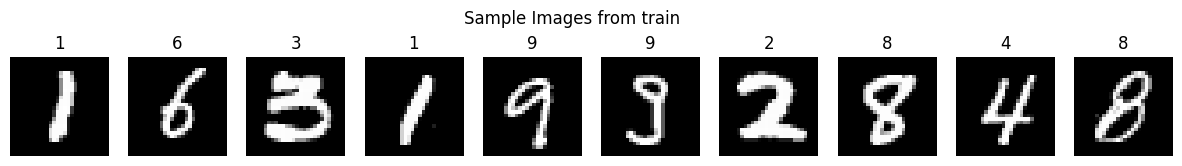

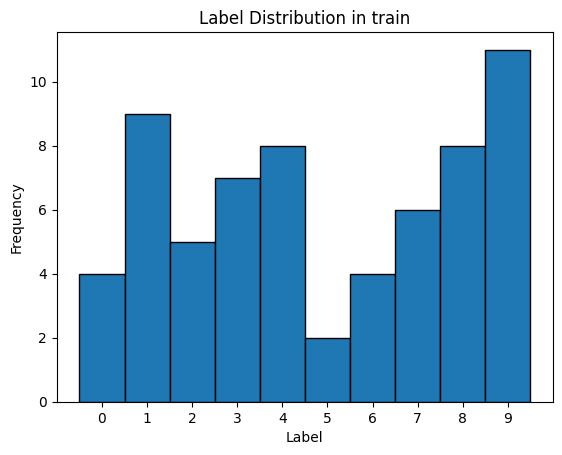

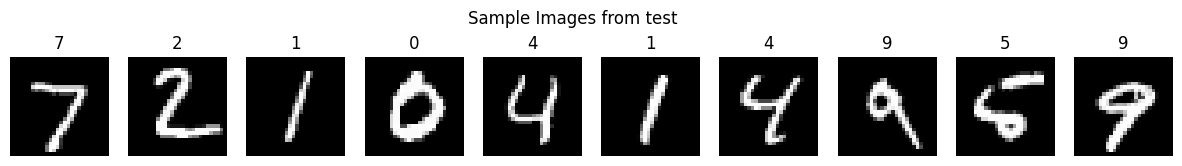

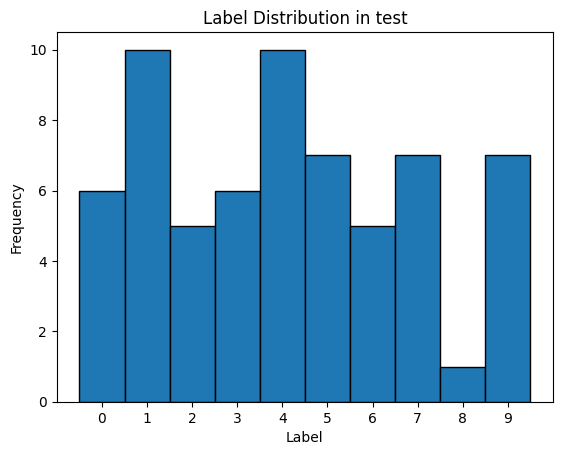

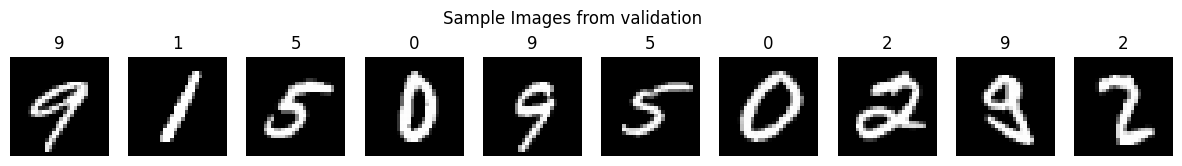

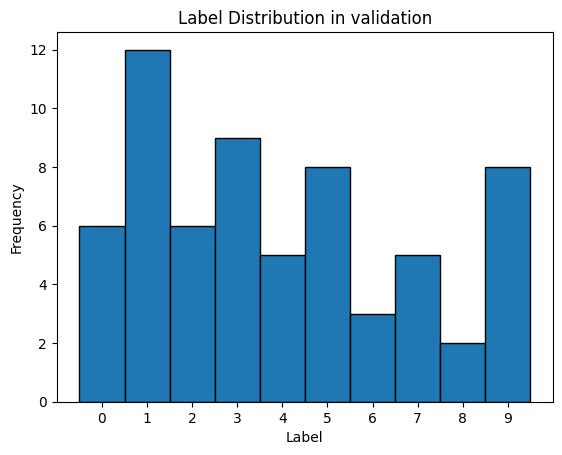

In [ ]:
train_loader, val_loader, test_loader = prepare_data()
explore_data(train_loader, "train")
explore_data(test_loader, "test")
explore_data(val_loader, "validation")

Prepare the data for use with the CART algorithm by flattening the images.

In [ ]:
def prepare_data_for_cart(data_loader):
    X, y = [], []
    for images, labels in data_loader:
        flat_images = images.view(images.size(0), -1)
        X.append(flat_images)
        y.append(labels)

    X = torch.cat(X).numpy()
    y = torch.cat(y).numpy()

    return X, y

In [ ]:
X_train, y_train = prepare_data_for_cart(train_loader)
X_val, y_val = prepare_data_for_cart(val_loader)
X_test, y_test = prepare_data_for_cart(test_loader)

## Part 2: CART Algorithm Implementation

1. Implement the CART algorithm from scratch, including:
   a. Node class to represent tree nodes
   b. DecisionTree class with the following methods:
      - `fit(X, y)`: Train the decision tree
      - `predict(X)`: Make predictions on new data
      - `_build_tree(X, y, depth)`: Recursively build the tree
      - `_find_best_split(X, y)`: Find the best feature and threshold for splitting
      - `_calculate_gini_impurity(y)`: Calculate Gini impurity for a set of labels
2. Your implementation should support the following hyperparameters:
   - `max_depth`: Maximum depth of the tree
   - `min_samples_split`: Minimum number of samples required to split an internal node

Note: Feel free to change, add, and remove functions.

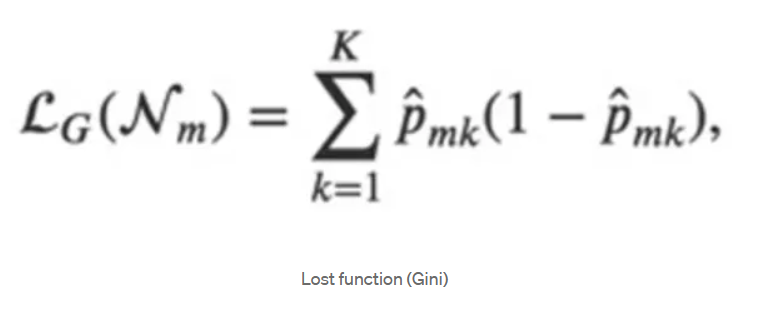

In [54]:
import random
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree_CART:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        print("Starting training...")
        self.root = self._build_tree(X, y)
        print("Training complete.")

    def _build_tree(self, X, y, depth=0):
        # Implement recursive tree building here
        # TO DO
        num_samples, num_features = X.shape
        unique_classes, counts = np.unique(y, return_counts=True)
        predicted_class = unique_classes[np.argmax(counts)]

        # print(f"Building tree at depth {depth}, number of samples: {num_samples}, gini: {self._gini_impurity(y):.4f}")

        if depth >= self.max_depth or num_samples < self.min_samples_split or len(unique_classes) == 1:
            return Node(value=predicted_class)

        feature, threshold = self._find_best_split(X, y)
        if feature is None:
            return Node(value=predicted_class)

        left_indices = X[:, feature] < threshold
        right_indices = ~left_indices
        left_child = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=feature, threshold=threshold, left=left_child, right=right_child)


    # def _find_best_split(self, X, y):
    #     # Implement best split finding here
    #     # TO DO
    #     best_gini = 1.0
    #     best_feature, best_threshold = None, None
    #     num_samples, num_features = X.shape
    #     j = 0
    #     for feature in range(num_features):
    #         print(j)
    #         j+=1
    #         thresholds, classes = zip(*sorted(zip(X[:, feature], y)))
    #         left_counts = [0] * len(np.unique(y))
    #         right_counts = np.bincount(y, minlength=len(np.unique(y)))

    #         for i in range(1, num_samples):
    #             c = classes[i - 1]
    #             left_counts[c] += 1
    #             right_counts[c] -= 1
    #             gini_left = 1.0 - sum((count / i) ** 2 for count in left_counts)
    #             gini_right = 1.0 - sum((count / (num_samples - i)) ** 2 for count in right_counts)
    #             gini = (i * gini_left + (num_samples - i) * gini_right) / num_samples

    #             if thresholds[i] != thresholds[i - 1] and gini < best_gini:
    #                 best_gini = gini
    #                 best_feature = feature
    #                 best_threshold = (thresholds[i] + thresholds[i - 1]) / 2

    #     return best_feature, best_threshold

    def _find_best_split(self, X, y):
        best_gini = 1.0
        best_feature, best_threshold = None, None
        num_samples, num_features = X.shape

        for feature in range(num_features):
            # Take quantiles as potential thresholds instead of all unique values
            unique_values = np.quantile(X[:, feature], q=np.linspace(0, 1, 10))
            for threshold in unique_values:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices
                if len(np.unique(y[left_indices])) == 0 or len(np.unique(y[right_indices])) == 0:
                    continue

                gini_left = self._gini_impurity(y[left_indices])
                gini_right = self._gini_impurity(y[right_indices])
                gini = (len(y[left_indices]) * gini_left + len(y[right_indices]) * gini_right) / num_samples

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold


    def _gini_impurity(self, y):
        # Implement Gini impurity calculation here
        # TO DO
        m = len(y)
        if m == 0:
            return 0
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))


    def predict(self, X):
        # Implement prediction here
        # TO DO
        predictions = []
        for sample in X:
            node = self.root
            # Traverse the tree for each sample
            while node.left is not None and node.right is not None:
                if sample[node.feature] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            # Append the predicted class (value at the leaf node)
            predictions.append(node.value)
        return predictions

## Part 3: Model Evaluation and Comparison

1. Train your CART implementation on the MNIST training data.
2. Evaluate your model's performance on the test set and report the accuracy.
3. Train scikit-learn's DecisionTreeClassifier on the same data.
4. Compare the performance of your implementation with scikit-learn's version.
5. Create a plot showing how accuracy changes with tree depth for both implementations.

In [55]:
# X_train = # TO DO
# y_train = # TO DO

tree = DecisionTree_CART(max_depth=5)
tree.fit(X_train, y_train)

# X_test = # TO DO
predictions = tree.predict(X_test)

# TO DO
accuracy_custom = np.mean(predictions == y_test)
print(f"Custom CART Decision Tree Accuracy: {accuracy_custom:.2f}")

Starting training...
Training complete.
Custom CART Decision Tree Accuracy: 0.67


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

sklearn_tree = DecisionTreeClassifier(max_depth=5)
sklearn_tree.fit(X_train, y_train)

sklearn_predictions = sklearn_tree.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, sklearn_predictions)
print(f"Scikit-learn Decision Tree Accuracy: {accuracy_sklearn:.2f}")

Scikit-learn Decision Tree Accuracy: 0.70


Starting training...
Training complete.
Starting training...
Training complete.
Starting training...
Training complete.
Starting training...
Training complete.
Starting training...
Training complete.
Starting training...
Training complete.
Starting training...
Training complete.
Starting training...
Training complete.
Starting training...
Training complete.


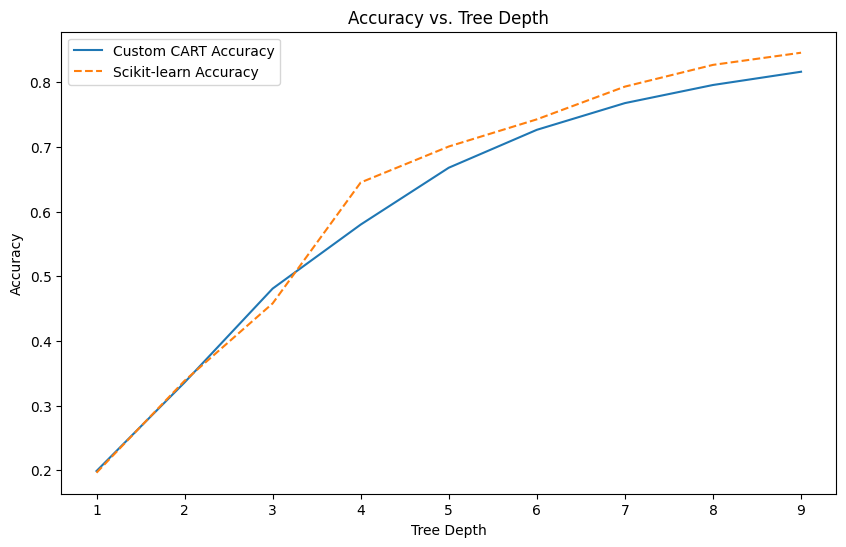

In [56]:
depths = range(1, 10)
accuracy_custom_list = []
accuracy_sklearn_list = []

for depth in depths:
    # Custom CART
    custom_tree = DecisionTree_CART(max_depth=depth)
    custom_tree.fit(X_train, y_train)
    custom_predictions = custom_tree.predict(X_test)
    accuracy_custom_list.append(np.mean(custom_predictions == y_test))

    # scikit-learn's Decision Tree
    sklearn_tree = DecisionTreeClassifier(max_depth=depth)
    sklearn_tree.fit(X_train, y_train)
    sklearn_predictions = sklearn_tree.predict(X_test)
    accuracy_sklearn_list.append(accuracy_score(y_test, sklearn_predictions))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_custom_list, label="Custom CART Accuracy")
plt.plot(depths, accuracy_sklearn_list, label="Scikit-learn Accuracy", linestyle="--")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Tree Depth")
plt.legend()
plt.show()

## Question
What is the difference between ID3 and CART algorithm?

The ID3 (Iterative Dichotomiser 3) and CART (Classification and Regression Trees) algorithms are both used to create decision trees, but they differ in their splitting criteria, structure, and applicability. Here’s a comparison of the two:

###Splitting Criterion:

ID3: Uses information gain based on entropy for classification.

CART: Uses Gini impurity for classification and mean squared error (MSE) for regression.


###Tree Structure:

ID3: Creates multi-branch (non-binary) trees, where each node can have multiple branches based on categorical feature values.

CART: Builds binary trees, with each node splitting data into two parts.


###Data Types:

ID3: Primarily handles categorical data (continuous data requires discretization).

CART: Handles both continuous and categorical data.


###Applications:

ID3: For classification tasks only.

CART: For both classification and regression tasks.


###Pruning and Overfitting:

ID3: No inherent pruning; additional methods are needed to prevent overfitting.

CART: Supports pruning, often used to reduce tree complexity and prevent overfitting.